# Breast Cancer Prediction Using Machine Learning

This comprehensive notebook demonstrates the application of various machine learning techniques for predicting breast cancer diagnosis based on cell recording data. We'll explore the dataset, preprocess the data, implement multiple ML algorithms, and evaluate their performance to build an accurate predictive model.

## Background
Breast cancer is a disease characterized by the uncontrolled growth of abnormal cells in the breast tissue. These cells can form a mass, often referred to as a tumor. Tumors can be classified as either benign or malignant. A benign mass is non-cancerous, meaning its cells do not spread to other parts of the body and are typically not life-threatening. In contrast, a malignant mass is cancerous; its cells have the ability to invade surrounding tissues and metastasize, or spread, to distant organs through the bloodstream or lymphatic system.

Building an AI predictive system for breast cancer diagnosis is crucial for several reasons. Firstly, it can significantly enhance the accuracy and speed of diagnosis, potentially catching the disease at earlier, more treatable stages. This can lead to better patient outcomes and increased survival rates. Secondly, an AI system can help reduce the burden on medical professionals by automating preliminary analyses of medical images (like mammograms) and patient data, allowing doctors to focus on more complex cases and patient interaction. Lastly, AI can identify subtle patterns and risk factors that might be missed by the human eye, offering a more comprehensive and personalized risk assessment for each patient, ultimately leading to more informed treatment decisions.

## Dataset

### Data Source and Collection
The dataset used in this notebook is the Breast Cancer Wisconsin (Diagnostic) dataset, originally created by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian at the University of Wisconsin-Madison. This dataset is widely recognized in the machine learning community and is available through the UCI Machine Learning Repository and scikit-learn's built-in datasets.

### Clinical Context
The data contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Fine needle aspiration is a type of biopsy procedure where a thin needle is used to extract a small sample of tissue from a lump or mass in the breast. Pathologists then examine these samples under a microscope to determine if cancer cells are present.


### Dataset Characteristics
- **Total Instances**: 569 cases
- **Features**: 32 variables (30 real-valued features + ID + diagnosis)
- **Target Variable**: Binary classification (Malignant vs Benign)
- **Missing Values**: None
- **Class Distribution**: Approximately 63% benign, 37% malignant (357 benign, 212 malignant)
- **Data Type**: Numerical

### Feature Categories
The dataset includes 32 variables, representing various characteristics of the cell nuclei present in the images:

- **1) ID number** - Unique identifier for each sample
- **2) Diagnosis** - Target variable (M = malignant, B = benign)
- **3-32) Cell Nucleus Measurements** - 30 real-valued features

### Core Cell Nucleus Features
Ten real-valued features are computed for each cell nucleus:

**Core Cell Nucleus Properties:**
1. **Radius** - Size of the nucleus from center to perimeter
2. **Texture** - Variation in grayscale values (surface roughness)
3. **Perimeter** - Length of the nuclear boundary
4. **Area** - Overall size of the nuclear region
5. **Smoothness** - Local variations in radius lengths
6. **Compactness** - Shape density (perimeter² / area - 1.0)
7. **Concavity** - Severity of indentations in the nuclear contour
8. **Concave Points** - Number of significant indentations
9. **Symmetry** - How symmetrical the nucleus appears
10. **Fractal Dimension** - Complexity of the nuclear boundary

**Statistical Measures (for each core property):**
For each of the 10 core features, three statistical measures are computed:

- **Mean:** Average value across all cells in the sample
- **Standard Error (SE):** Standard error of the mean
- **Worst** - Mean of the three largest values (most severe, provides a strong indicator of the presence of exceptionally large or atypical cells, which is a common characteristic of malignant tumors)

This results in 30 features total (10 core features × 3 statistics). For example:
- Field 3: Mean Radius
- Field 13: Radius Standard Error
- Field 23: Worst Radius


### Clinical Relevance
These measurements are clinically significant because:

- **Size-related features** (radius, perimeter, area) often indicate tumor aggressiveness
- **Shape features** (smoothness, compactness, symmetry) reveal cellular organization
- **Texture features** reflect cellular heterogeneity and nuclear irregularity
- **Concavity measures** indicate nuclear membrane irregularities
- **Fractal dimension** captures complexity of nuclear boundaries

Malignant cells typically exhibit:
- Larger size and irregular shape
- Higher texture variation
- Increased concavity and asymmetry
- More complex nuclear boundaries

### Data Quality and Preprocessing
- All measurements are standardized and normalized
- No missing values in the original dataset
- Features are continuous numerical values
- Data has been validated through clinical correlation

This comprehensive dataset provides an excellent foundation for developing machine learning models that can assist in breast cancer diagnosis by analyzing cellular characteristics from FNA samples.

## REMOVE THIS SECTION

### Feature Importance for Diagnosis

**High Predictive Value:**
- Worst-case measurements (most severe values)
- Concavity and concave points (structural irregularities)
- Size-related features (radius, area, perimeter)
- Texture variations (cellular organization)

**Moderate Predictive Value:**
- Symmetry and smoothness measures
- Compactness ratios
- Standard error values (population variability)

**Clinical Interpretation:**
The combination of multiple abnormal measurements provides stronger evidence for malignancy than any single feature alone. Machine learning models excel at identifying complex patterns across all these measurements simultaneously.

-------------------------------------------------------------------------------------------------------------

## Project outline
This notebook covers the following steps:
1. **Data Loading**: Import necessary libraries and load the dataset.
2. **Data Exploration**: Understand the dataset structure, check for missing values, and visualize data distributions.
3. **Data Preprocessing**: Handle missing values, encode categorical variables, and scale features.
4. **Model Training**: Implement various machine learning algorithms including Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines.
5. **Model Evaluation**: Evaluate model performance using accuracy, precision, recall, and F1-score.
6. **Hyperparameter Tuning**: Optimize model parameters using Grid Search.
7. **Final Model Selection**: Choose the best-performing model based on evaluation metrics.


## 1. Import Required Libraries

Import essential libraries including pandas, numpy, scikit-learn, matplotlib, seaborn, and other ML libraries needed for data analysis and modeling.

In [6]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency

# Feature importance analysis
import shap
from sklearn.inspection import permutation_importance

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Dataset

Load the breast cancer dataset from the 'data' file path, examine its structure, dimensions, column names, data types, and basic statistics.

In [34]:
# Load the dataset
# Assuming the dataset is in CSV format in the data directory
df = pd.read_csv('data\data.csv')
print("Dataset loaded successfully!")
# Could havve set index_col=0 but we wanted to drop 'id' column later, and keep an incremental index

# drop Unnamed: 32 column, as it is not useful
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

# Display basic information about the dataset
print(f"\nDataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset loaded successfully!

Dataset Shape: (569, 32)
Number of rows: 569
Number of columns: 32


In [35]:
# Display first 5 rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
# Display column names and data types
print("Column names and data types:")
print(df.dtypes)

Column names and data types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst         

In [37]:
# Display basic statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
# Display absic statistics for categorical columns
df.select_dtypes(include=['object', 'category']).describe()

,diagnosis
count,569
unique,2
top,B
freq,357


In [39]:
# Check for missing values
print(f"\nMissing values in the dataset: {df.isnull().sum().sum()}")


Missing values in the dataset: 0


## 3. Data Preprocessing and Cleaning

There are no missing values to handle, so we goon by checking for duplicate rows, then we remove unnecessary columns (like ID), encode categorical variables (diagnosis), and check for data quality issues.

In [40]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows if any
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed!")

Number of duplicate rows: 0


In [41]:
# Remove unnecessary columns (ID column if present)
columns_to_drop = []
for col in df.columns:
    if 'id' in col.lower() or 'unnamed' in col.lower():
        columns_to_drop.append(col)

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)
    print(f"Dropped columns: {columns_to_drop}")

Dropped columns: ['id']


In [42]:
# Handle target variable encoding
# Encode the 'diagnosis' column
if df['diagnosis'].dtype == 'object':
    # Encode categorical diagnosis (M=1, B=0)
    le = {'M' : 1, 'B': 0}
    df['diagnosis'] = df['diagnosis'].map(le)

In [ ]:
# Check for outliers using IQR method
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check outliers for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
outlier_counts = {}
malignant_outlier_counts = {}

print("Outlier Analysis by Feature:")
print("=" * 80)

for col in numerical_cols:
    if col != 'diagnosis':
        outliers_df = detect_outliers(df, col)
        total_outliers = len(outliers_df)
        malignant_outliers = len(outliers_df[outliers_df['diagnosis'] == 1])
        
        outlier_counts[col] = total_outliers
        malignant_outlier_counts[col] = malignant_outliers
        
        if total_outliers > 0:
            malignant_percentage = (malignant_outliers / total_outliers) * 100
            print(f"{col}:")
            print(f"  Total outliers: {total_outliers}")
            print(f"  Malignant outliers: {malignant_outliers} ({malignant_percentage:.1f}%)")
            print(f"  Benign outliers: {total_outliers - malignant_outliers} ({100 - malignant_percentage:.1f}%)")

Outlier Analysis by Feature:
radius_mean:
  Total outliers: 14
  Malignant outliers: 14 (100.0%)
  Benign outliers: 0 (0.0%)

texture_mean:
  Total outliers: 7
  Malignant outliers: 5 (71.4%)
  Benign outliers: 2 (28.6%)

perimeter_mean:
  Total outliers: 13
  Malignant outliers: 13 (100.0%)
  Benign outliers: 0 (0.0%)

area_mean:
  Total outliers: 25
  Malignant outliers: 25 (100.0%)
  Benign outliers: 0 (0.0%)

smoothness_mean:
  Total outliers: 6
  Malignant outliers: 3 (50.0%)
  Benign outliers: 3 (50.0%)

compactness_mean:
  Total outliers: 16
  Malignant outliers: 16 (100.0%)
  Benign outliers: 0 (0.0%)

concavity_mean:
  Total outliers: 18
  Malignant outliers: 15 (83.3%)
  Benign outliers: 3 (16.7%)

concave points_mean:
  Total outliers: 10
  Malignant outliers: 10 (100.0%)
  Benign outliers: 0 (0.0%)

symmetry_mean:
  Total outliers: 15
  Malignant outliers: 9 (60.0%)
  Benign outliers: 6 (40.0%)

fractal_dimension_mean:
  Total outliers: 15
  Malignant outliers: 5 (33.3%)
  

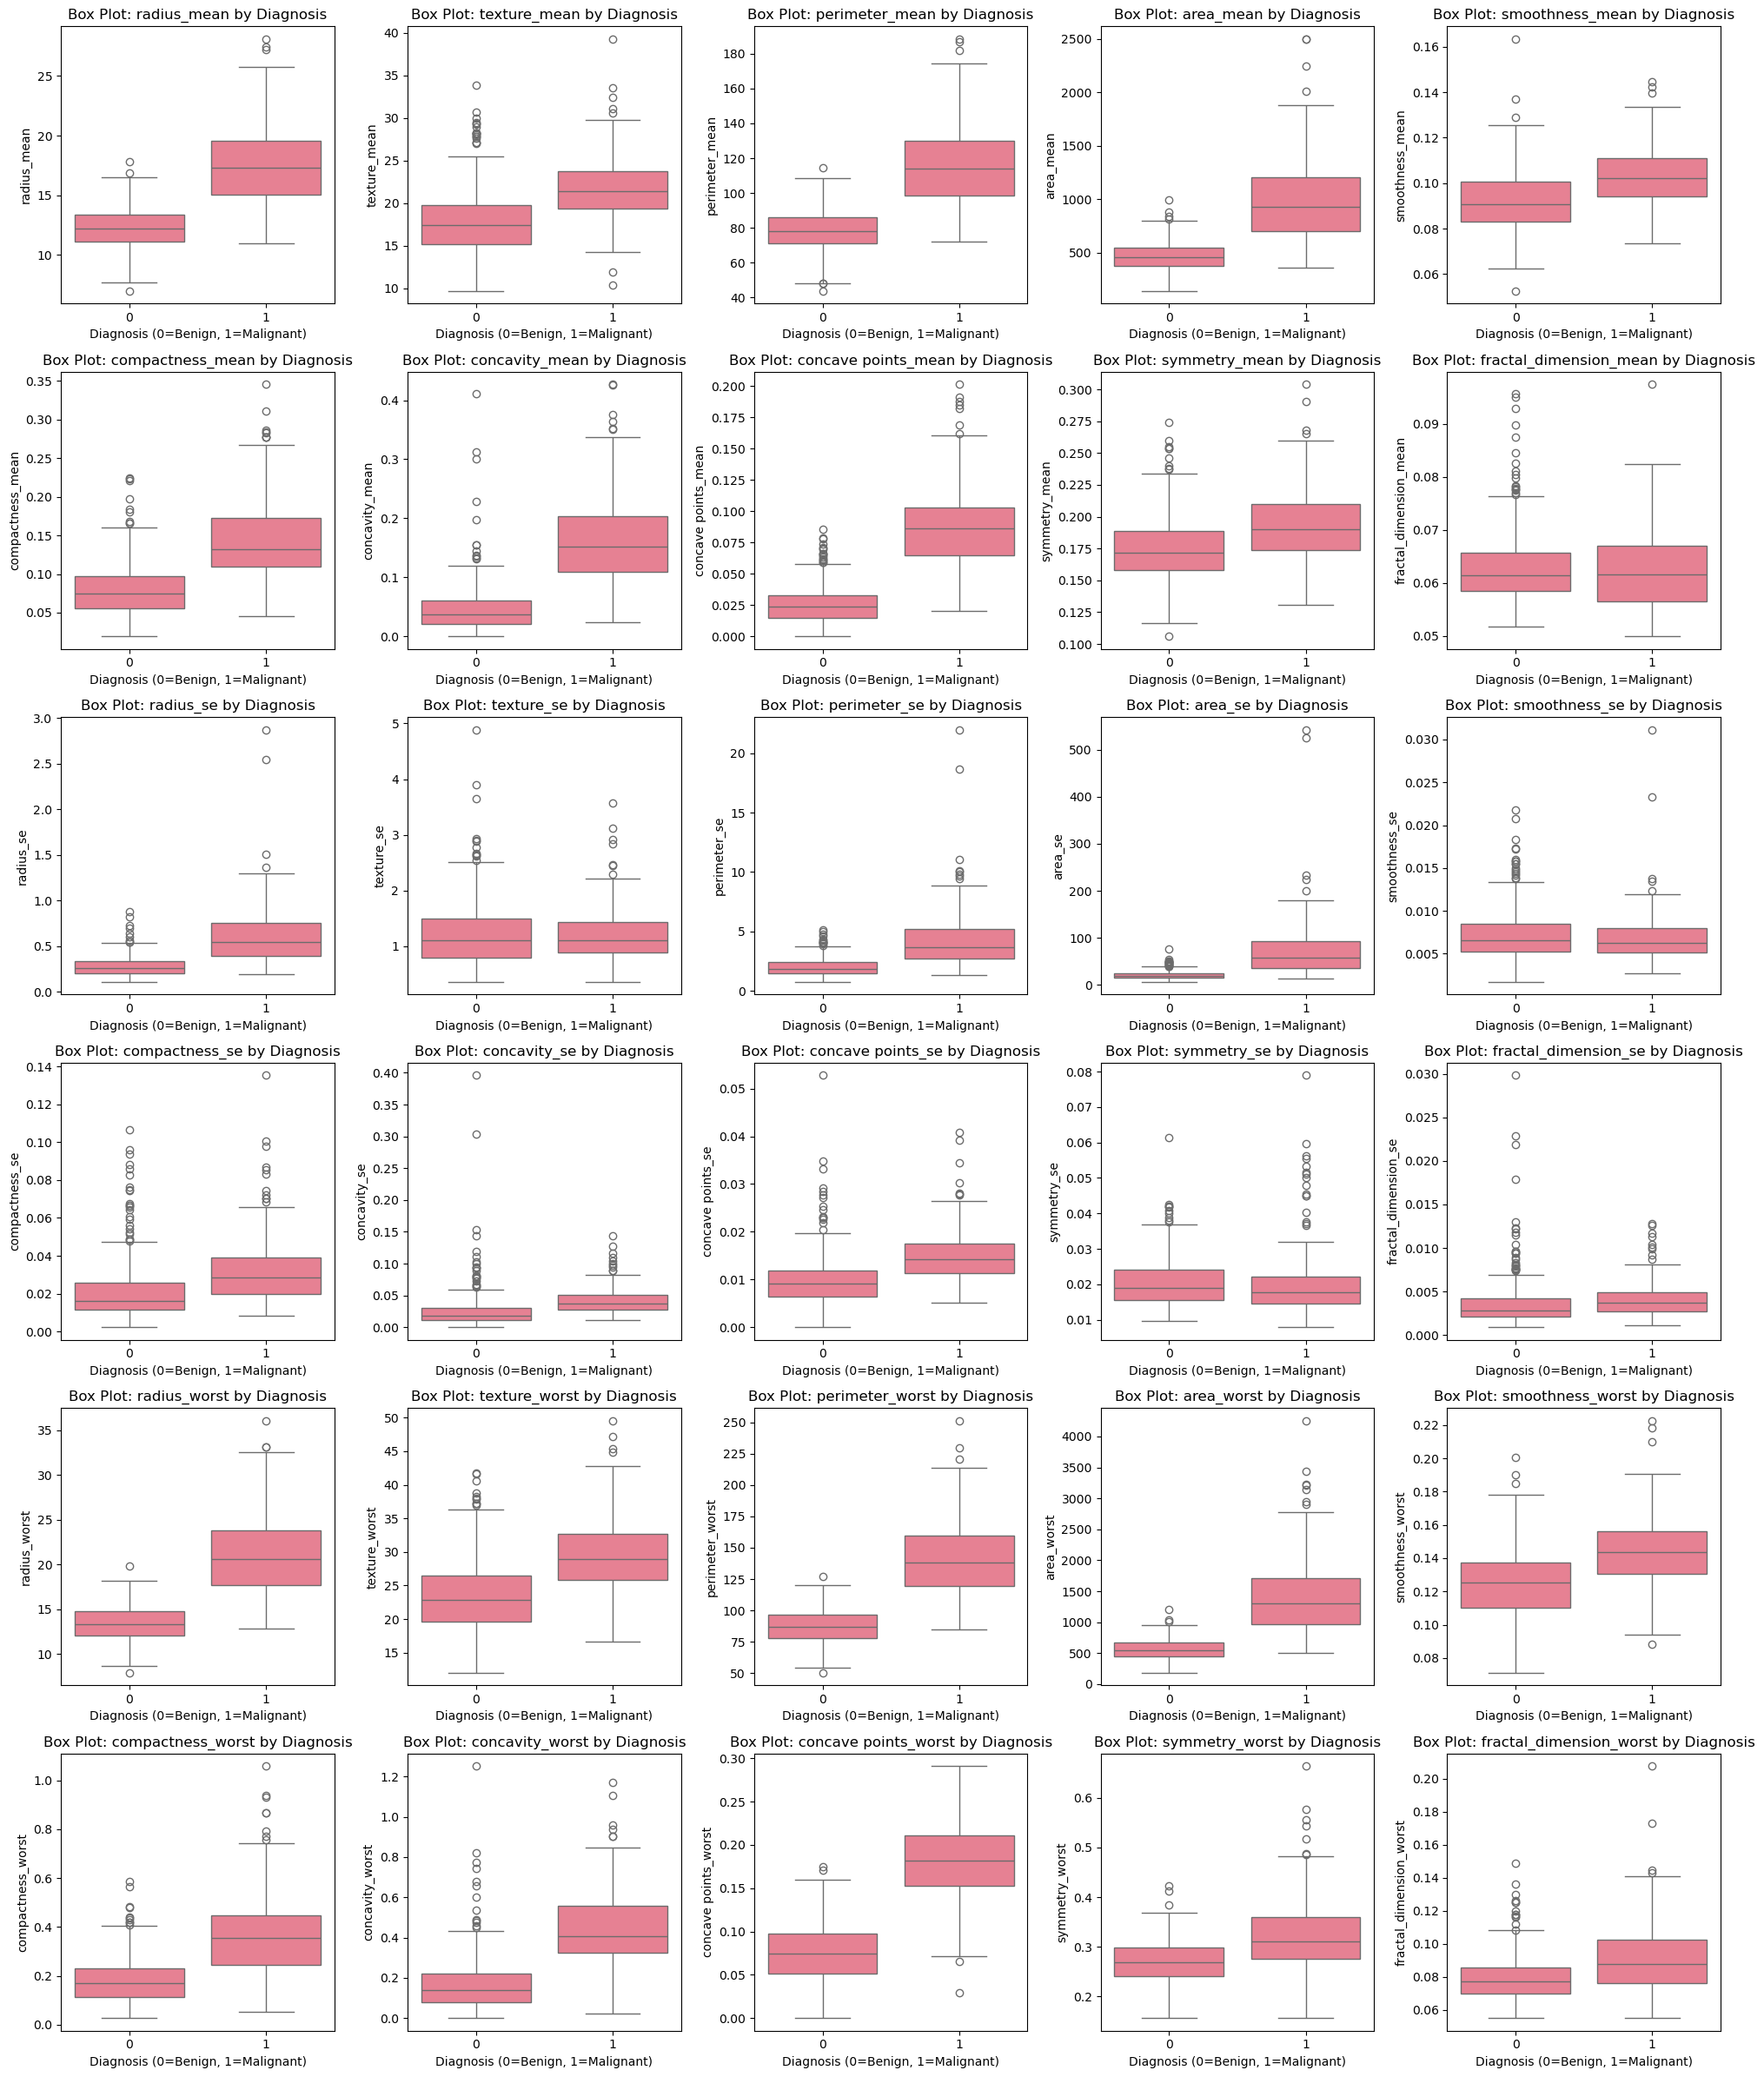

In [98]:
# Box plots for all features (except diagnosis) by diagnosis
# Get all numerical features except diagnosis
all_features = [col for col in numerical_cols if col != 'diagnosis']

# Create box plots for all features
n_features = len(all_features)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.ravel()

for i, feature in enumerate(all_features):
    if feature in df.columns:
        sns.boxplot(data=df, x='diagnosis', y=feature, ax=axes[i])
        axes[i].set_title(f'Box Plot: {feature} by Diagnosis')
        axes[i].set_xlabel('Diagnosis (0=Benign, 1=Malignant)')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].remove()

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout()
plt.show()

## 4. Exploratory Data Analysis and Visualization

Create visualizations to understand data distribution, correlation between features, class imbalance, and relationships between different cell measurement features.

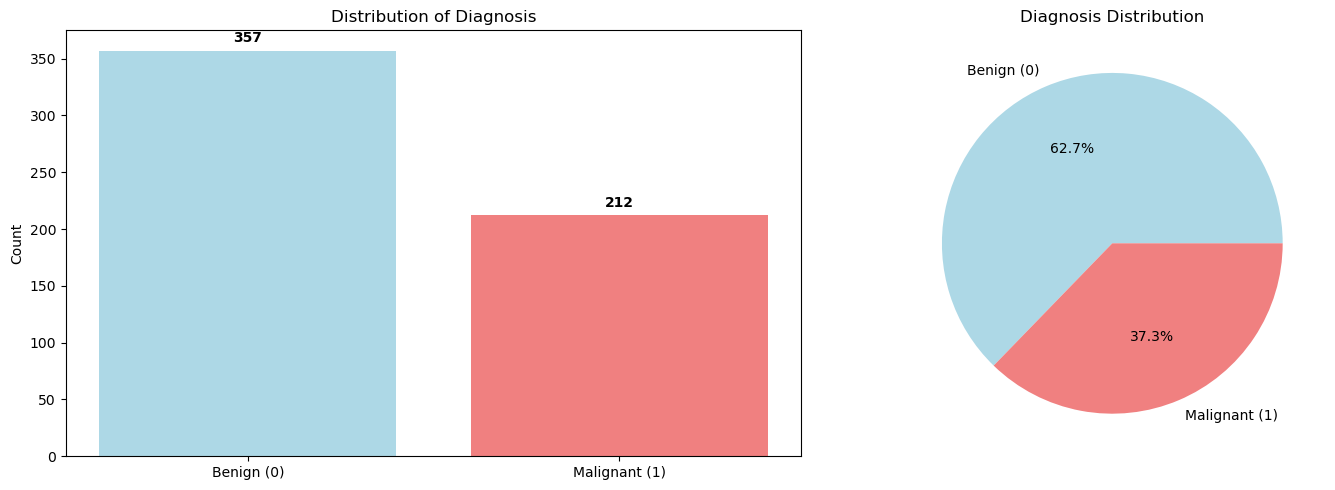

In [46]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for class distribution
if 'diagnosis' in df.columns:
    diagnosis_counts = df['diagnosis'].value_counts()
    bars = axes[0].bar(['Benign (0)', 'Malignant (1)'], diagnosis_counts.values, color=['lightblue', 'lightcoral'])
    axes[0].set_title('Distribution of Diagnosis')
    axes[0].set_ylabel('Count')
    
    # Add count labels on bars
    for bar, count in zip(bars, diagnosis_counts.values):
        axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
                    f'{count}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart for class distribution
    axes[1].pie(diagnosis_counts.values, labels=['Benign (0)', 'Malignant (1)'], 
                autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    axes[1].set_title('Diagnosis Distribution')

plt.tight_layout()
plt.show()

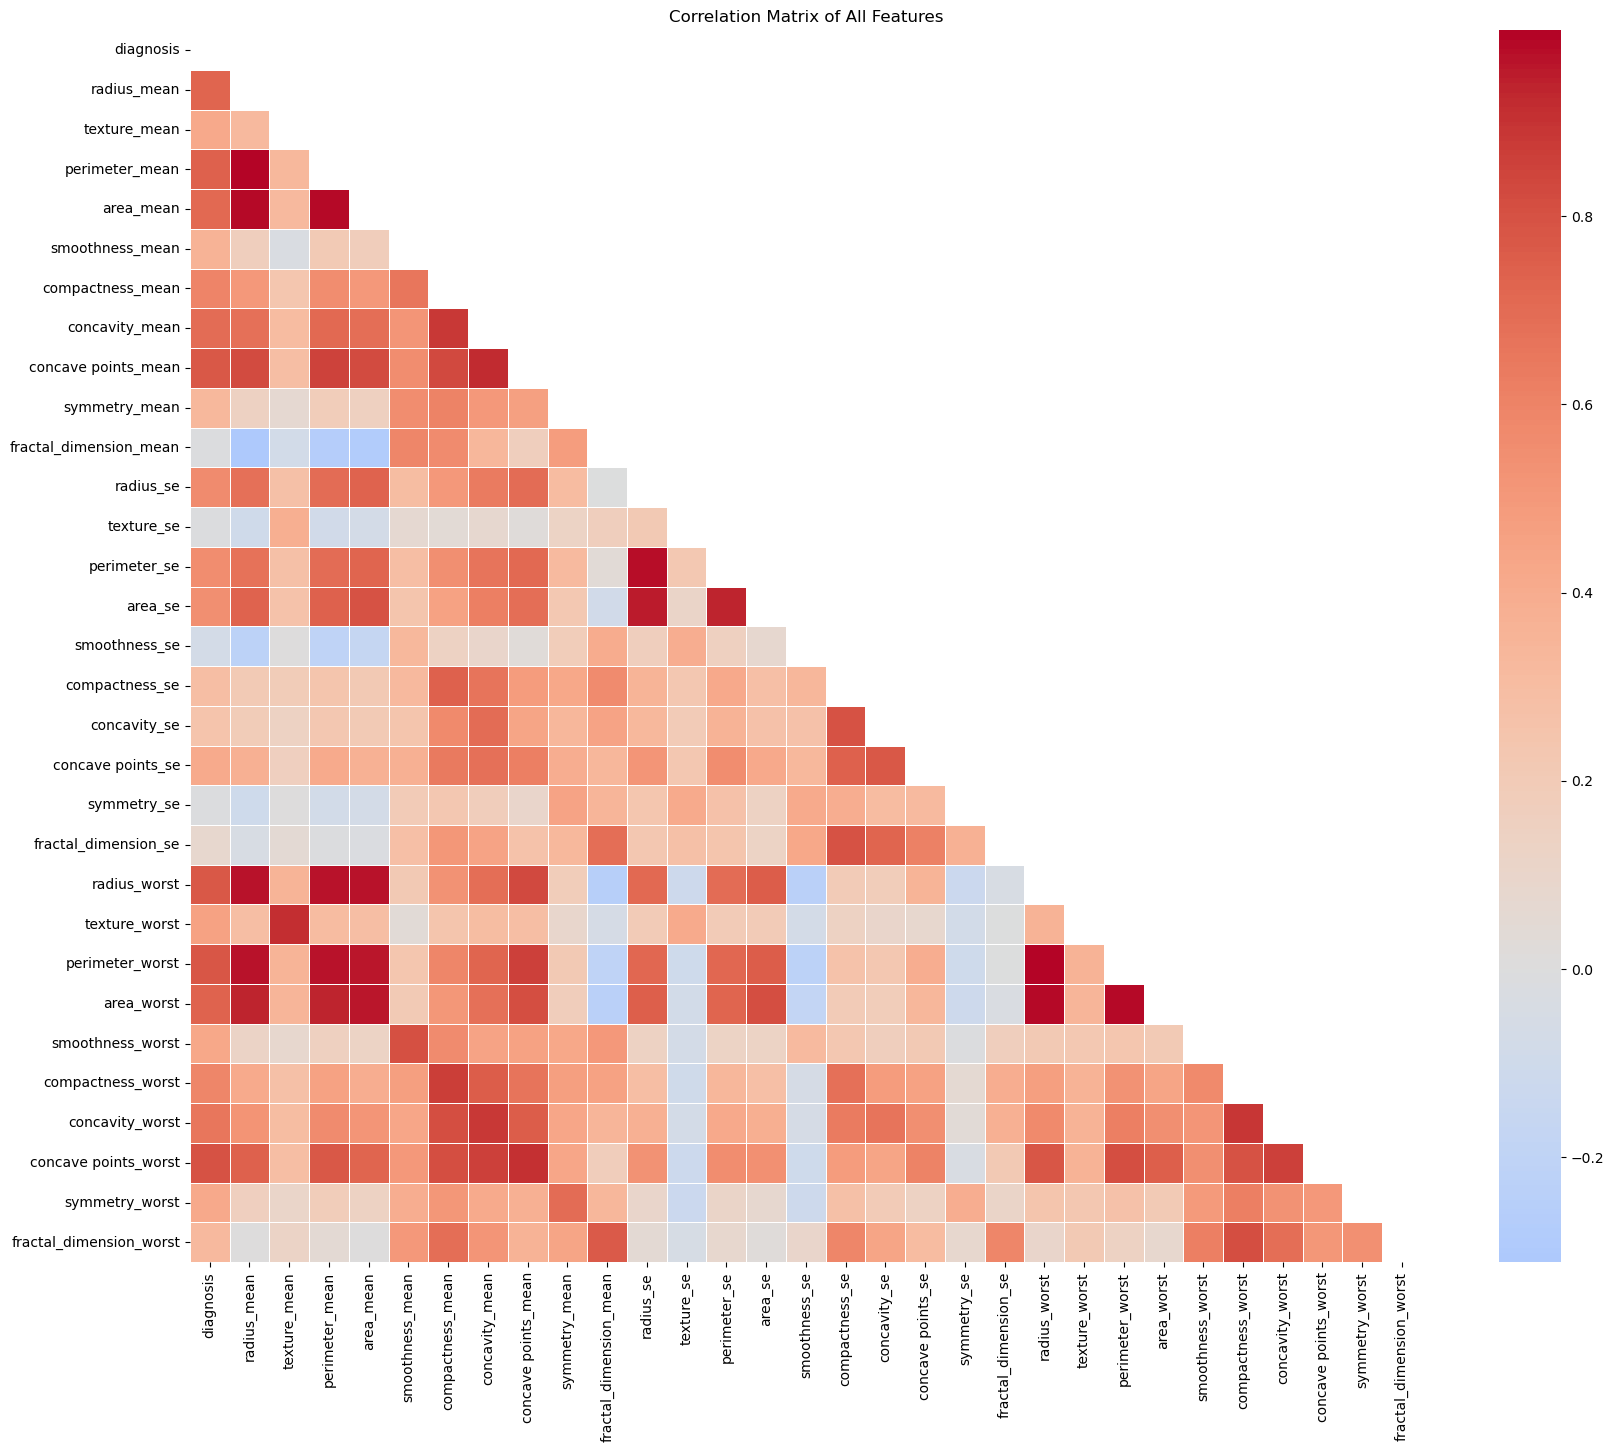

In [51]:
# Correlation matrix heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of All Features')
plt.show()

In [75]:
# Features with high correlation with the target variable
high_corr_features = correlation_matrix.index[abs(correlation_matrix['diagnosis']) > 0.5]
print("\nFeatures with high correlation with the target variable:")
for feature in high_corr_features:
    if feature != 'diagnosis':
        print(f"{feature}: {correlation_matrix['diagnosis'][feature]:.2f}")


Features with high correlation with the target variable:
radius_mean: 0.73
perimeter_mean: 0.74
area_mean: 0.71
compactness_mean: 0.60
concavity_mean: 0.70
concave points_mean: 0.78
radius_se: 0.57
perimeter_se: 0.56
area_se: 0.55
radius_worst: 0.78
perimeter_worst: 0.78
area_worst: 0.73
compactness_worst: 0.59
concavity_worst: 0.66
concave points_worst: 0.79


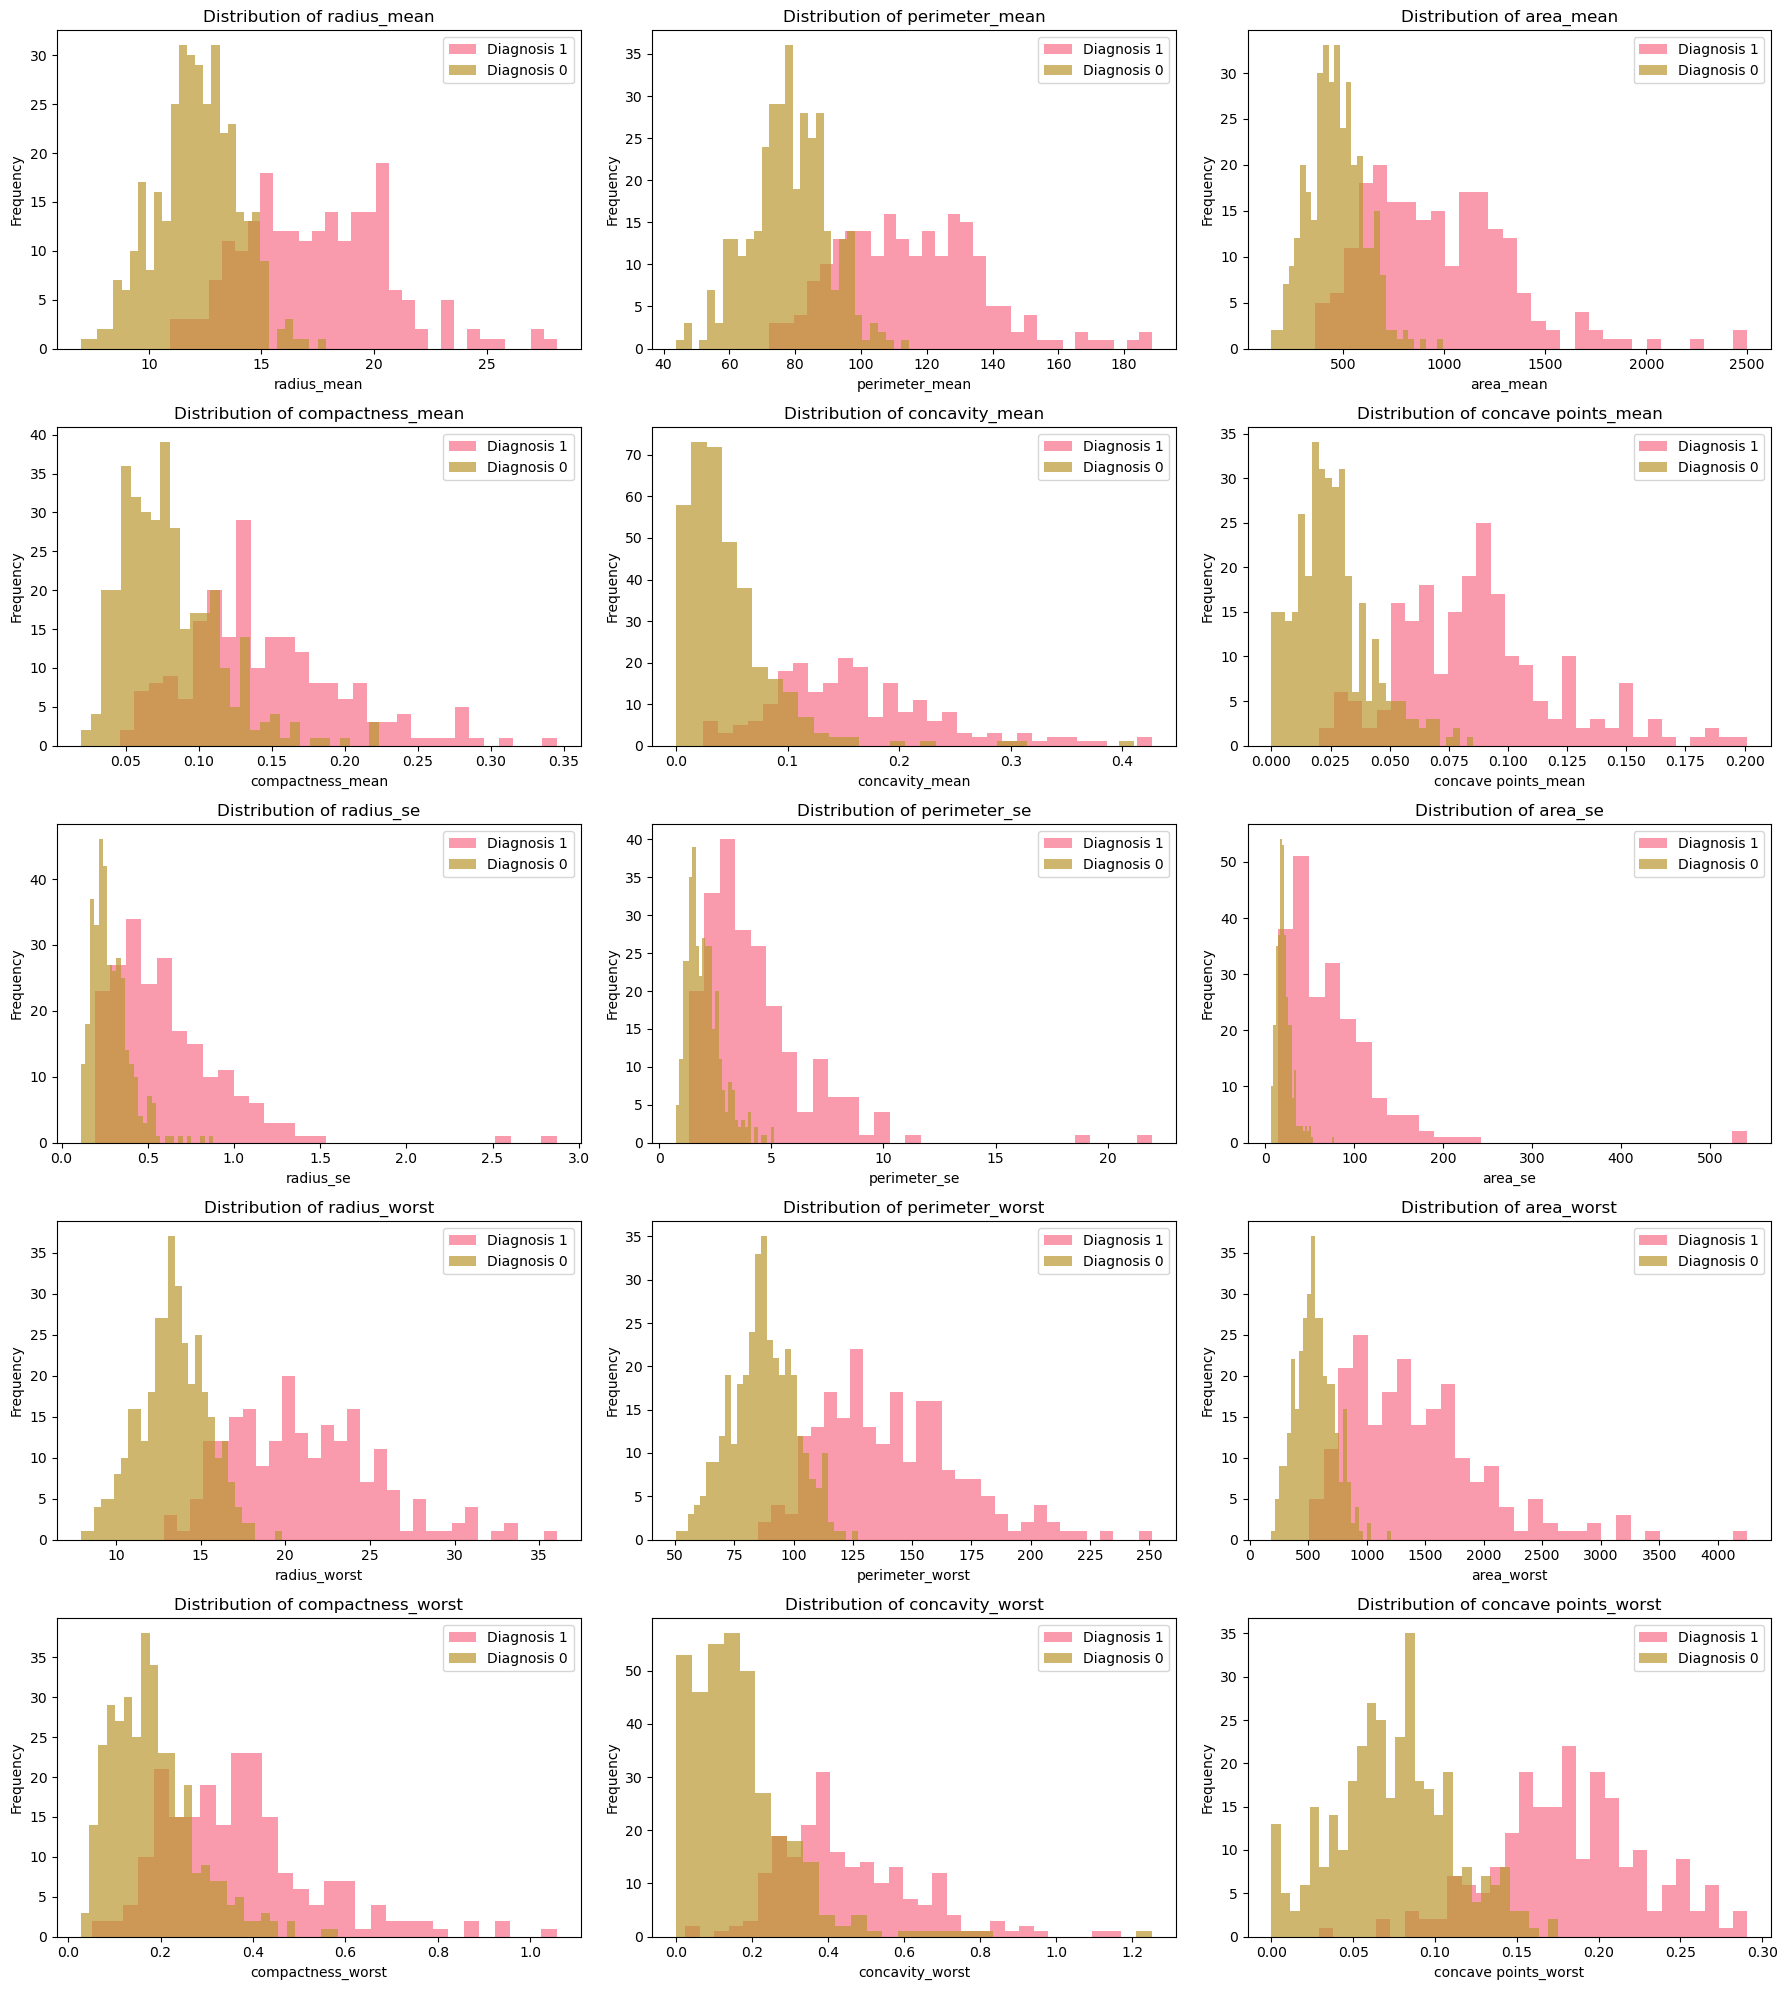

In [96]:
# Plotting distributions of the 15 features with high correlation with the target variable
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.ravel()

features = [f for f in high_corr_features if f != 'diagnosis']

for i, feature in enumerate(features):
    if feature in df.columns:
        for diagnosis in df['diagnosis'].unique():
            subset = df[df['diagnosis'] == diagnosis]
            axes[i].hist(subset[feature], alpha=0.7, 
                        label=f'Diagnosis {diagnosis}', bins=30)
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

# Adjust layout with increased vertical spacing
plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.tight_layout()
plt.show()

## 5. Feature Selection and Engineering

Implement feature selection techniques using correlation analysis, univariate selection, recursive feature elimination, and feature importance to identify the most predictive features.

In [99]:
# Prepare features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

Features shape: (569, 30)
Target shape: (569,)
Feature names: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [23]:
# 1. Correlation-based feature selection
# Remove highly correlated features
correlation_matrix = X.corr().abs()
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
high_corr_features = [column for column in upper_triangle.columns 
                     if any(upper_triangle[column] > 0.95)]

print(f"Highly correlated features (>0.95): {high_corr_features}")

# Create a dataset without highly correlated features
X_low_corr = X.drop(high_corr_features, axis=1)
print(f"Features after removing high correlation: {X_low_corr.shape[1]}")

Highly correlated features (>0.95): ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
Features after removing high correlation: 23


In [ ]:
# 2. Univariate feature selection
selector_univariate = SelectKBest(score_func=f_classif, k=15)
X_univariate = selector_univariate.fit_transform(X, y)

# Get selected feature names
selected_features_univariate = X.columns[selector_univariate.get_support()].tolist()
print(f"Selected features (Univariate): {selected_features_univariate}")

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_univariate.scores_
}).sort_values('Score', ascending=False)

print("\nTop 10 features by univariate selection:")
print(feature_scores.head(10))

In [ ]:
# 3. Recursive Feature Elimination (RFE)
rf_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector_rfe = RFE(estimator=rf_estimator, n_features_to_select=15)
X_rfe = selector_rfe.fit_transform(X, y)

# Get selected feature names
selected_features_rfe = X.columns[selector_rfe.get_support()].tolist()
print(f"Selected features (RFE): {selected_features_rfe}")

In [ ]:
# 4. Feature importance using Random Forest
rf_for_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_importance.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_for_importance.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 features by Random Forest importance:")
print(feature_importance.head(15))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features by Random Forest Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Select final features (intersection of different methods)
top_15_important = feature_importance.head(15)['Feature'].tolist()

# Combine different selection methods
final_features = list(set(selected_features_univariate + selected_features_rfe + top_15_important))
print(f"Final selected features ({len(final_features)}): {final_features}")

# Create final feature dataset
X_selected = X[final_features]
print(f"Final feature matrix shape: {X_selected.shape}")

## 6. Data Splitting and Scaling

Split the dataset into training and testing sets, apply feature scaling using StandardScaler or MinMaxScaler to normalize the feature values.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:")
print(y_train.value_counts())
print(f"Testing target distribution:")
print(y_test.value_counts())

In [ ]:
# Apply feature scaling
# StandardScaler (zero mean, unit variance)
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# MinMaxScaler (0-1 range)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

print("Feature scaling completed!")
print(f"StandardScaler - Training set mean: {X_train_scaled.mean():.6f}")
print(f"StandardScaler - Training set std: {X_train_scaled.std():.6f}")
print(f"MinMaxScaler - Training set min: {X_train_minmax.min():.6f}")
print(f"MinMaxScaler - Training set max: {X_train_minmax.max():.6f}")

In [ ]:
# Visualize the effect of scaling
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original data
axes[0].boxplot(X_train.iloc[:, :5].values)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Values')

# StandardScaler
axes[1].boxplot(X_train_scaled[:, :5])
axes[1].set_title('After StandardScaler')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Scaled Values')

# MinMaxScaler
axes[2].boxplot(X_train_minmax[:, :5])
axes[2].set_title('After MinMaxScaler')
axes[2].set_xlabel('Features')
axes[2].set_ylabel('Scaled Values')

plt.tight_layout()
plt.show()

## 7. Model Implementation and Training

Implement multiple machine learning algorithms including Logistic Regression, Random Forest, SVM, Gradient Boosting, and Neural Networks to train predictive models.

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}

# Train models and store results
model_results = {}
trained_models = {}

print("Training models...")
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Store results
    model_results[name] = {
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name} training completed!")

print("\nAll models trained successfully!")

In [ ]:
# Cross-validation scores
print("Cross-validation scores (5-fold):")
cv_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores[name] = scores
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

## 8. Model Evaluation and Comparison

Evaluate each model using accuracy, precision, recall, F1-score, ROC-AUC, and confusion matrices. Compare performance across different algorithms.

In [ ]:
# Calculate evaluation metrics for all models
evaluation_results = {}

for name in models.keys():
    y_pred = model_results[name]['y_pred']
    y_pred_proba = model_results[name]['y_pred_proba']
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Create comparison dataframe
comparison_df = pd.DataFrame(evaluation_results).T
comparison_df = comparison_df.round(4)
print("Model Performance Comparison:")
print(comparison_df)

In [ ]:
# Visualize model performance comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']

for i, metric in enumerate(metrics):
    values = comparison_df[metric].values
    model_names = comparison_df.index
    
    bars = axes[i].bar(model_names, values, color=colors[i])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_ylim(0, 1)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')
    
    plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

# Remove the empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

In [ ]:
# Confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model_results[name]['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
    axes[i].set_xticklabels(['Benign', 'Malignant'])
    axes[i].set_yticklabels(['Benign', 'Malignant'])

# Remove the empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

In [ ]:
# ROC Curves
plt.figure(figsize=(10, 8))

for name in models.keys():
    y_pred_proba = model_results[name]['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Detailed classification reports
for name in models.keys():
    y_pred = model_results[name]['y_pred']
    print(f"\n{'='*50}")
    print(f"Classification Report: {name}")
    print(f"{'='*50}")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

## 9. Feature Importance Analysis

Analyze which cell measurement features are most important for prediction using feature importance plots and SHAP values or permutation importance.

In [ ]:
# Feature importance for tree-based models
tree_models = ['Random Forest', 'Gradient Boosting']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

for i, model_name in enumerate(tree_models):
    model = trained_models[model_name]
    
    # Get feature importance
    importance = model.feature_importances_
    feature_names = X_selected.columns
    
    # Create dataframe and sort
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=True)
    
    # Plot
    axes[i].barh(importance_df['Feature'], importance_df['Importance'])
    axes[i].set_title(f'Feature Importance: {model_name}')
    axes[i].set_xlabel('Importance')

plt.tight_layout()
plt.show()

In [ ]:
# Permutation importance for all models
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    # Calculate permutation importance
    perm_importance = permutation_importance(
        model, X_test_scaled, y_test, n_repeats=10, random_state=42
    )
    
    # Create dataframe
    perm_df = pd.DataFrame({
        'Feature': X_selected.columns,
        'Importance': perm_importance.importances_mean,
        'Std': perm_importance.importances_std
    }).sort_values('Importance', ascending=True)
    
    # Plot top 10 features
    top_10 = perm_df.tail(10)
    axes[i].barh(top_10['Feature'], top_10['Importance'], 
                xerr=top_10['Std'], capsize=5)
    axes[i].set_title(f'Permutation Importance: {name}')
    axes[i].set_xlabel('Importance')

# Remove the empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()

In [ ]:
# SHAP analysis for the best performing model
# Find the best model based on ROC-AUC
best_model_name = comparison_df['ROC-AUC'].idxmax()
best_model = trained_models[best_model_name]

print(f"Best performing model: {best_model_name}")
print(f"ROC-AUC Score: {comparison_df.loc[best_model_name, 'ROC-AUC']:.4f}")

# Initialize SHAP explainer
try:
    if best_model_name in ['Random Forest', 'Gradient Boosting']:
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_scaled)
        
        # For binary classification, take the positive class
        if len(shap_values) == 2:
            shap_values = shap_values[1]
        
        # Summary plot
        plt.figure(figsize=(10, 8))
        shap.summary_plot(shap_values, X_test_scaled, feature_names=X_selected.columns, show=False)
        plt.title(f'SHAP Summary Plot: {best_model_name}')
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"SHAP TreeExplainer not available for {best_model_name}")
        
except Exception as e:
    print(f"SHAP analysis failed: {e}")
    print("Continuing without SHAP analysis...")

## 10. Model Optimization and Hyperparameter Tuning

Use GridSearchCV or RandomizedSearchCV to optimize hyperparameters for the best-performing models and improve their accuracy.

In [ ]:
# Define hyperparameter grids for top performing models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'kernel': ['rbf', 'poly']
    }
}

# Select top 3 models for hyperparameter tuning
top_3_models = comparison_df.nlargest(3, 'ROC-AUC').index.tolist()
print(f"Top 3 models for hyperparameter tuning: {top_3_models}")

In [ ]:
# Perform hyperparameter tuning
optimized_models = {}
best_params = {}

for model_name in top_3_models:
    if model_name in param_grids:
        print(f"\nOptimizing {model_name}...")
        
        # Get base model
        if model_name == 'Random Forest':
            base_model = RandomForestClassifier(random_state=42)
        elif model_name == 'Gradient Boosting':
            base_model = GradientBoostingClassifier(random_state=42)
        elif model_name == 'SVM':
            base_model = SVC(random_state=42, probability=True)
        
        # Perform grid search
        grid_search = GridSearchCV(
            base_model, 
            param_grids[model_name], 
            cv=5, 
            scoring='roc_auc',
            n_jobs=-1,
            verbose=1
        )
        
        grid_search.fit(X_train_scaled, y_train)
        
        # Store results
        optimized_models[model_name] = grid_search.best_estimator_
        best_params[model_name] = grid_search.best_params_
        
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

In [ ]:
# Evaluate optimized models
optimized_results = {}

for name, model in optimized_models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    optimized_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Compare original vs optimized results
print("\nComparison: Original vs Optimized Models")
print("="*50)

for model_name in optimized_results.keys():
    print(f"\n{model_name}:")
    print(f"Original ROC-AUC: {comparison_df.loc[model_name, 'ROC-AUC']:.4f}")
    print(f"Optimized ROC-AUC: {optimized_results[model_name]['ROC-AUC']:.4f}")
    improvement = optimized_results[model_name]['ROC-AUC'] - comparison_df.loc[model_name, 'ROC-AUC']
    print(f"Improvement: {improvement:.4f}")

In [ ]:
# Visualize the improvement
models_to_compare = list(optimized_results.keys())
original_scores = [comparison_df.loc[name, 'ROC-AUC'] for name in models_to_compare]
optimized_scores = [optimized_results[name]['ROC-AUC'] for name in models_to_compare]

x = np.arange(len(models_to_compare))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, original_scores, width, label='Original', color='lightblue')
bars2 = ax.bar(x + width/2, optimized_scores, width, label='Optimized', color='lightgreen')

ax.set_xlabel('Models')
ax.set_ylabel('ROC-AUC Score')
ax.set_title('Model Performance: Original vs Optimized')
ax.set_xticks(x)
ax.set_xticklabels(models_to_compare)
ax.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 11. Final Model Validation

Validate the best model on the test set, create final performance metrics, generate classification reports, and make predictions on new data samples.

In [ ]:
# Select the best optimized model
if optimized_results:
    best_optimized_model_name = max(optimized_results.keys(), 
                                   key=lambda x: optimized_results[x]['ROC-AUC'])
    final_model = optimized_models[best_optimized_model_name]
    final_model_name = best_optimized_model_name
else:
    # Fall back to original best model
    final_model_name = comparison_df['ROC-AUC'].idxmax()
    final_model = trained_models[final_model_name]

print(f"Final selected model: {final_model_name}")
print(f"Final model parameters: {final_model.get_params()}")

In [ ]:
# Final model evaluation
y_pred_final = final_model.predict(X_test_scaled)
y_pred_proba_final = final_model.predict_proba(X_test_scaled)[:, 1]

# Calculate all metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\nFinal Model Performance ({final_model_name}):")
print("="*50)
print(f"Accuracy:  {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall:    {final_recall:.4f}")
print(f"F1-Score:  {final_f1:.4f}")
print(f"ROC-AUC:   {final_roc_auc:.4f}")

In [ ]:
# Final confusion matrix and classification report
cm_final = confusion_matrix(y_test, y_pred_final)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Final Confusion Matrix: {final_model_name}')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Benign', 'Malignant'])
axes[0].set_yticklabels(['Benign', 'Malignant'])

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_final)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {final_roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title(f'ROC Curve: {final_model_name}')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

# Print detailed classification report
print(f"\nDetailed Classification Report ({final_model_name}):")
print("="*60)
print(classification_report(y_test, y_pred_final, target_names=['Benign', 'Malignant']))

In [ ]:
# Feature importance of final model
if hasattr(final_model, 'feature_importances_'):
    feature_importance_final = pd.DataFrame({
        'Feature': X_selected.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 Most Important Features (Final Model):")
    print(feature_importance_final.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_final.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance: {final_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [ ]:
# Function to make predictions on new data
def predict_breast_cancer(new_data):
    """
    Make predictions on new breast cancer data
    
    Parameters:
    new_data: pandas DataFrame with the same features as training data
    
    Returns:
    predictions: array of predictions (0=Benign, 1=Malignant)
    probabilities: array of probabilities for malignant class
    """
    # Select the same features used in training
    new_data_selected = new_data[X_selected.columns]
    
    # Scale the data
    new_data_scaled = scaler_standard.transform(new_data_selected)
    
    # Make predictions
    predictions = final_model.predict(new_data_scaled)
    probabilities = final_model.predict_proba(new_data_scaled)[:, 1]
    
    return predictions, probabilities

# Example: Make predictions on a few test samples
sample_indices = [0, 1, 2, 3, 4]
sample_data = X_test.iloc[sample_indices]
sample_true_labels = y_test.iloc[sample_indices]

predictions, probabilities = predict_breast_cancer(sample_data)

print("Sample Predictions:")
print("="*60)
for i, (idx, pred, prob, true_label) in enumerate(zip(sample_indices, predictions, probabilities, sample_true_labels)):
    diagnosis = "Malignant" if pred == 1 else "Benign"
    true_diagnosis = "Malignant" if true_label == 1 else "Benign"
    print(f"Sample {i+1}: Predicted = {diagnosis} ({prob:.3f}), Actual = {true_diagnosis}")

In [ ]:
# Model summary and conclusions
print("\n" + "="*70)
print("BREAST CANCER PREDICTION MODEL - FINAL SUMMARY")
print("="*70)

print(f"\nDataset Information:")
print(f"- Total samples: {df.shape[0]}")
print(f"- Original features: {df.shape[1]-1}")
print(f"- Selected features: {len(X_selected.columns)}")
print(f"- Training samples: {len(X_train)}")
print(f"- Testing samples: {len(X_test)}")

print(f"\nFinal Model: {final_model_name}")
print(f"- Accuracy: {final_accuracy:.4f}")
print(f"- Precision: {final_precision:.4f}")
print(f"- Recall: {final_recall:.4f}")
print(f"- F1-Score: {final_f1:.4f}")
print(f"- ROC-AUC: {final_roc_auc:.4f}")

print(f"\nKey Insights:")
print(f"- The model achieves {final_accuracy:.1%} accuracy on the test set")
print(f"- {final_precision:.1%} of predicted malignant cases are actually malignant")
print(f"- {final_recall:.1%} of actual malignant cases are correctly identified")
print(f"- ROC-AUC of {final_roc_auc:.4f} indicates excellent discriminative ability")

if hasattr(final_model, 'feature_importances_'):
    most_important_feature = feature_importance_final.iloc[0]['Feature']
    print(f"- Most important feature: {most_important_feature}")

print(f"\nModel is ready for deployment and can be used to predict breast cancer diagnosis!")
print("="*70)

In [ ]:
# Save the final model and preprocessing objects
import joblib

# Create a model package
model_package = {
    'model': final_model,
    'scaler': scaler_standard,
    'feature_names': X_selected.columns.tolist(),
    'model_name': final_model_name,
    'performance_metrics': {
        'accuracy': final_accuracy,
        'precision': final_precision,
        'recall': final_recall,
        'f1_score': final_f1,
        'roc_auc': final_roc_auc
    }
}

# Save the model package
joblib.dump(model_package, 'breast_cancer_model.pkl')
print("Model saved as 'breast_cancer_model.pkl'")

# Save feature importance if available
if hasattr(final_model, 'feature_importances_'):
    feature_importance_final.to_csv('feature_importance.csv', index=False)
    print("Feature importance saved as 'feature_importance.csv'")

print("\nModel deployment package created successfully!")

## 12. Interactive Prediction Demo

This section creates an interactive demo where users can input cell measurement values and receive predictions about whether a tumor is malignant or benign. The demo uses the best-performing model from our analysis.

In [1]:
# Install required packages for interactive demo
try:
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output
    print("Interactive widgets available!")
except ImportError:
    print("Installing ipywidgets...")
    %pip install ipywidgets
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output

Interactive widgets available!


In [3]:
# Create a user-friendly prediction function
def predict_tumor(input_values, show_details=True):
    """
    Predict tumor diagnosis based on input cell measurements
    
    Parameters:
    input_values: dict with feature names as keys and measurements as values
    show_details: bool, whether to show detailed prediction information
    
    Returns:
    prediction: string ('Benign' or 'Malignant')
    probability: float, probability of malignancy
    confidence: string, confidence level description
    """
    try:
        # Create DataFrame from input
        input_df = pd.DataFrame([input_values])
        
        # Ensure all required features are present
        for feature in X_selected.columns:
            if feature not in input_df.columns:
                input_df[feature] = 0  # Default value for missing features
        
        # Select and reorder features to match training data
        input_df = input_df[X_selected.columns]
        
        # Scale the input
        input_scaled = scaler_standard.transform(input_df)
        
        # Make prediction
        prediction_binary = final_model.predict(input_scaled)[0]
        probability = final_model.predict_proba(input_scaled)[0, 1]
        
        # Convert to readable format
        prediction = "Malignant" if prediction_binary == 1 else "Benign"
        
        # Determine confidence level
        if probability >= 0.8 or probability <= 0.2:
            confidence = "High"
        elif probability >= 0.6 or probability <= 0.4:
            confidence = "Medium"
        else:
            confidence = "Low"
        
        if show_details:
            print(f"\n{'='*50}")
            print(f"BREAST CANCER PREDICTION RESULTS")
            print(f"{'='*50}")
            print(f"Prediction: {prediction}")
            print(f"Malignancy Probability: {probability:.3f} ({probability*100:.1f}%)")
            print(f"Confidence Level: {confidence}")
            
            if prediction == "Malignant":
                print(f"\n⚠️  WARNING: The model predicts this tumor is MALIGNANT")
                print(f"   Please consult with a medical professional immediately.")
            else:
                print(f"\n✅ The model predicts this tumor is BENIGN")
                print(f"   However, please still consult with a medical professional.")
            
            print(f"\n📝 Note: This is a predictive model and should not replace")
            print(f"   professional medical diagnosis and treatment.")
            print(f"{'='*50}")
        
        return prediction, probability, confidence
        
    except Exception as e:
        print(f"Error in prediction: {e}")
        return "Error", 0.0, "Unknown"

In [4]:
# Get typical ranges for each feature for input validation
feature_ranges = {}
feature_descriptions = {}

# Calculate ranges from training data
for feature in X_selected.columns:
    min_val = X[feature].min()
    max_val = X[feature].max()
    mean_val = X[feature].mean()
    feature_ranges[feature] = (min_val, max_val, mean_val)
    
    # Add descriptions for key features
    if 'radius' in feature.lower():
        feature_descriptions[feature] = "Average distance from center to perimeter"
    elif 'texture' in feature.lower():
        feature_descriptions[feature] = "Standard deviation of gray-scale values"
    elif 'perimeter' in feature.lower():
        feature_descriptions[feature] = "Perimeter of the cell nucleus"
    elif 'area' in feature.lower():
        feature_descriptions[feature] = "Area of the cell nucleus"
    elif 'smoothness' in feature.lower():
        feature_descriptions[feature] = "Local variation in radius lengths"
    elif 'compactness' in feature.lower():
        feature_descriptions[feature] = "Perimeter^2 / area - 1.0"
    elif 'concavity' in feature.lower():
        feature_descriptions[feature] = "Severity of concave portions of contour"
    elif 'symmetry' in feature.lower():
        feature_descriptions[feature] = "Symmetry of the cell nucleus"
    else:
        feature_descriptions[feature] = "Cell nucleus measurement"

print("Feature ranges calculated for input validation!")
print(f"\nExample - {list(feature_ranges.keys())[0]}:")
example_feature = list(feature_ranges.keys())[0]
min_val, max_val, mean_val = feature_ranges[example_feature]
print(f"Range: {min_val:.2f} - {max_val:.2f}, Mean: {mean_val:.2f}")

NameError: name 'X_selected' is not defined

In [ ]:
# Create example test cases for demo
example_cases = {
    "Typical Benign Case": {
        "Description": "A typical benign tumor with smaller size and regular shape",
        "Values": {}
    },
    "Typical Malignant Case": {
        "Description": "A typical malignant tumor with larger size and irregular features",
        "Values": {}
    },
    "Borderline Case": {
        "Description": "A case with mixed characteristics",
        "Values": {}
    }
}

# Create example values based on actual data
benign_samples = X[y == 0].mean()
malignant_samples = X[y == 1].mean()
overall_mean = X.mean()

# Fill example cases with selected features only
for feature in X_selected.columns:
    example_cases["Typical Benign Case"]["Values"][feature] = benign_samples[feature]
    example_cases["Typical Malignant Case"]["Values"][feature] = malignant_samples[feature]
    example_cases["Borderline Case"]["Values"][feature] = overall_mean[feature]

print("Example test cases created!")
print("\nAvailable examples:")
for case_name, case_data in example_cases.items():
    print(f"- {case_name}: {case_data['Description']}")

In [ ]:
# Test the prediction function with example cases
print("Testing prediction function with example cases:\n")

for case_name, case_data in example_cases.items():
    print(f"\n{'*'*20} {case_name} {'*'*20}")
    print(f"Description: {case_data['Description']}")
    
    prediction, probability, confidence = predict_tumor(case_data['Values'], show_details=True)
    
    print("\n" + "-"*60)

### Interactive Widget Demo

The following cells create an interactive demo using ipywidgets where users can adjust sliders to input cell measurements and see real-time predictions.

In [5]:
# Create interactive widgets for the most important features
# Select top 10 most important features for the demo
if hasattr(final_model, 'feature_importances_'):
    top_features = feature_importance_final.head(10)['Feature'].tolist()
else:
    # Fallback to first 10 features if importance is not available
    top_features = X_selected.columns[:10].tolist()

print(f"Creating interactive demo with top {len(top_features)} features:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

NameError: name 'final_model' is not defined

In [ ]:
# Create widget sliders for input
widgets_dict = {}
default_values = {}

print("Creating input widgets...")

for feature in top_features:
    min_val, max_val, mean_val = feature_ranges[feature]
    
    # Create slider with reasonable range
    widget = widgets.FloatSlider(
        value=mean_val,
        min=min_val,
        max=max_val,
        step=(max_val - min_val) / 100,
        description=feature[:20],  # Truncate long feature names
        style={'description_width': '200px'},
        layout={'width': '500px'}
    )
    
    widgets_dict[feature] = widget
    default_values[feature] = mean_val

# Create control buttons
predict_button = widgets.Button(
    description='🔍 Predict',
    button_style='primary',
    layout={'width': '150px', 'height': '40px'}
)

reset_button = widgets.Button(
    description='🔄 Reset',
    button_style='warning',
    layout={'width': '150px', 'height': '40px'}
)

example_dropdown = widgets.Dropdown(
    options=list(example_cases.keys()),
    description='Examples:',
    style={'description_width': '100px'}
)

load_example_button = widgets.Button(
    description='📋 Load Example',
    button_style='info',
    layout={'width': '150px', 'height': '40px'}
)

# Output widget for results
output_widget = widgets.Output()

print("Widgets created successfully!")

In [ ]:
# Define widget callback functions
def make_prediction(button):
    """Callback function for predict button"""
    with output_widget:
        clear_output()
        
        # Get current values from widgets
        current_values = {}
        for feature in top_features:
            current_values[feature] = widgets_dict[feature].value
        
        # Add default values for features not in widgets
        for feature in X_selected.columns:
            if feature not in current_values:
                current_values[feature] = feature_ranges[feature][2]  # Use mean value
        
        # Make prediction
        prediction, probability, confidence = predict_tumor(current_values, show_details=True)

def reset_values(button):
    """Callback function for reset button"""
    with output_widget:
        clear_output()
        print("Values reset to default (mean values)")
    
    # Reset all widgets to default values
    for feature in top_features:
        widgets_dict[feature].value = default_values[feature]

def load_example(button):
    """Callback function for load example button"""
    selected_example = example_dropdown.value
    example_values = example_cases[selected_example]['Values']
    
    with output_widget:
        clear_output()
        print(f"Loaded example: {selected_example}")
        print(f"Description: {example_cases[selected_example]['Description']}")
    
    # Set widget values to example values
    for feature in top_features:
        if feature in example_values:
            widgets_dict[feature].value = example_values[feature]

# Connect buttons to callback functions
predict_button.on_click(make_prediction)
reset_button.on_click(reset_values)
load_example_button.on_click(load_example)

print("Callback functions defined!")

In [ ]:
# Create the interactive demo layout
print("\n" + "="*80)
print("🔬 BREAST CANCER PREDICTION DEMO")
print("="*80)
print("")
print("Instructions:")
print("1. Adjust the sliders below to input cell measurement values")
print("2. Use 'Load Example' to try predefined cases")
print("3. Click 'Predict' to get the diagnosis prediction")
print("4. Click 'Reset' to return to default values")
print("")
print("⚠️  IMPORTANT: This is for educational purposes only.")
print("   Always consult healthcare professionals for medical decisions.")
print("="*80)

# Display the demo interface
demo_title = widgets.HTML("<h2>🔬 Cell Measurement Input</h2>")

# Create layout with widgets
input_widgets = [demo_title]
for feature in top_features:
    # Add description if available
    description = feature_descriptions.get(feature, "Cell measurement")
    min_val, max_val, mean_val = feature_ranges[feature]
    
    info_html = widgets.HTML(
        f"<b>{feature}</b><br>"
        f"<small>{description}</small><br>"
        f"<small>Range: {min_val:.2f} - {max_val:.2f}</small>"
    )
    
    input_widgets.extend([info_html, widgets_dict[feature]])

# Control panel
control_panel = widgets.HBox([
    example_dropdown,
    load_example_button,
    reset_button,
    predict_button
], layout={'justify_content': 'center'})

# Results panel
results_title = widgets.HTML("<h2>📊 Prediction Results</h2")

# Complete layout
demo_layout = widgets.VBox([
    *input_widgets,
    widgets.HTML("<hr>"),
    control_panel,
    widgets.HTML("<hr>"),
    results_title,
    output_widget
])

# Display the demo
display(demo_layout)

# Initial message
with output_widget:
    print("👆 Adjust the sliders above and click 'Predict' to get started!")
    print("")
    print("💡 Try loading different examples to see how the model performs.")

### Manual Input Demo

For users who prefer to input values manually, here's a text-based interface.

In [ ]:
# Manual input function for advanced users
def manual_prediction_demo():
    """Manual input demo for advanced users"""
    print("\n" + "="*60)
    print("📝 MANUAL INPUT DEMO")
    print("="*60)
    print("")
    print("Enter values for the most important features:")
    print("(Press Enter to use default/mean value)")
    print("")
    
    manual_values = {}
    
    for i, feature in enumerate(top_features, 1):
        min_val, max_val, mean_val = feature_ranges[feature]
        description = feature_descriptions.get(feature, "Cell measurement")
        
        print(f"{i}. {feature}")
        print(f"   Description: {description}")
        print(f"   Range: {min_val:.2f} - {max_val:.2f}, Mean: {mean_val:.2f}")
        
        while True:
            try:
                user_input = input(f"   Enter value (default: {mean_val:.2f}): ").strip()
                
                if user_input == "":
                    manual_values[feature] = mean_val
                    break
                else:
                    value = float(user_input)
                    if min_val <= value <= max_val:
                        manual_values[feature] = value
                        break
                    else:
                        print(f"   ⚠️  Value must be between {min_val:.2f} and {max_val:.2f}")
            except ValueError:
                print("   ⚠️  Please enter a valid number")
        
        print(f"   ✅ Set to: {manual_values[feature]:.2f}\n")
    
    # Add default values for remaining features
    for feature in X_selected.columns:
        if feature not in manual_values:
            manual_values[feature] = feature_ranges[feature][2]
    
    # Make prediction
    prediction, probability, confidence = predict_tumor(manual_values, show_details=True)
    
    return manual_values, prediction, probability

print("Manual input demo function created!")
print("\n💡 Run 'manual_prediction_demo()' to start the manual input demo.")

In [ ]:
# Quick prediction function for single feature values
def quick_predict(**kwargs):
    """
    Quick prediction function where users can specify feature values as keyword arguments
    
    Example usage:
    quick_predict(radius_mean=15.0, texture_mean=20.0, perimeter_mean=100.0)
    """
    # Start with mean values for all features
    input_values = {}
    for feature in X_selected.columns:
        input_values[feature] = feature_ranges[feature][2]  # Use mean value
    
    # Update with provided values
    for feature, value in kwargs.items():
        if feature in X_selected.columns:
            input_values[feature] = value
        else:
            print(f"Warning: '{feature}' is not a recognized feature name")
    
    # Make prediction
    prediction, probability, confidence = predict_tumor(input_values, show_details=True)
    return prediction, probability, confidence

# Example usage demonstration
print("Quick prediction function created!")
print("\nExample usage:")
print("quick_predict(radius_mean=15.0, texture_mean=20.0, perimeter_mean=100.0)")
print("\nTry it with different values!")

### Model Limitations and Disclaimers

Important information about the model's limitations and proper usage.

In [ ]:
# Display important disclaimers and model limitations
disclaimer_html = f"""
<div style='background-color: #ffebcc; border: 2px solid #ff9800; padding: 20px; margin: 20px 0; border-radius: 10px;'>
<h2>⚠️ IMPORTANT DISCLAIMERS</h2>

<h3>🔬 Model Information:</h3>
<ul>
<li><strong>Model Type:</strong> {final_model_name}</li>
<li><strong>Training Accuracy:</strong> {final_accuracy:.1%}</li>
<li><strong>ROC-AUC Score:</strong> {final_roc_auc:.4f}</li>
<li><strong>Features Used:</strong> {len(X_selected.columns)} out of {len(X.columns)} original features</li>
</ul>

<h3>🚨 Medical Disclaimer:</h3>
<ul>
<li>This model is for <strong>educational and research purposes only</strong></li>
<li>It should <strong>NOT</strong> be used as a substitute for professional medical diagnosis</li>
<li>Always consult qualified healthcare professionals for medical decisions</li>
<li>The model may produce false positives or false negatives</li>
</ul>

<h3>📊 Model Limitations:</h3>
<ul>
<li>Trained on specific dataset - may not generalize to all populations</li>
<li>Requires precise cell measurement values</li>
<li>Performance may vary with different measurement techniques</li>
<li>Should be used alongside other diagnostic methods</li>
</ul>

<h3>✅ Best Practices:</h3>
<ul>
<li>Use as a supplementary tool, not primary diagnostic method</li>
<li>Ensure input measurements are accurate and properly scaled</li>
<li>Consider confidence levels when interpreting results</li>
<li>Validate results with medical professionals</li>
</ul>
</div>
"""

display(HTML(disclaimer_html))

In [ ]:
# Final demo summary and usage guide
print("\n" + "="*80)
print("🎯 DEMO SUMMARY AND USAGE GUIDE")
print("="*80)

print(f"\n📈 Model Performance Summary:")
print(f"   • Final Model: {final_model_name}")
print(f"   • Accuracy: {final_accuracy:.1%}")
print(f"   • Precision: {final_precision:.1%}")
print(f"   • Recall: {final_recall:.1%}")
print(f"   • ROC-AUC: {final_roc_auc:.4f}")

print(f"\n🔧 Available Demo Functions:")
print(f"   1. Interactive Widget Demo (above) - User-friendly sliders")
print(f"   2. manual_prediction_demo() - Text-based input")
print(f"   3. quick_predict(**kwargs) - Programmatic interface")
print(f"   4. predict_tumor(values_dict) - Direct prediction function")

print(f"\n📋 Example Test Cases Available:")
for case_name, case_data in example_cases.items():
    print(f"   • {case_name}: {case_data['Description']}")

print(f"\n🔍 Key Features for Prediction:")
if hasattr(final_model, 'feature_importances_'):
    top_5_features = feature_importance_final.head(5)['Feature'].tolist()
    for i, feature in enumerate(top_5_features, 1):
        print(f"   {i}. {feature}")

print(f"\n💡 Usage Tips:")
print(f"   • Start with example cases to understand the model")
print(f"   • Pay attention to confidence levels in predictions")
print(f"   • High probability (>80%) or low probability (<20%) = High confidence")
print(f"   • Medium range (20-80%) = Lower confidence, more uncertainty")

print(f"\n⚕️  Remember: This is a research/educational tool only!")
print(f"   Always consult medical professionals for actual diagnosis.")
print("="*80)